## Natural frequencies and mode shapes of a beam

### We will determine the natural frequencies and mode shapes of a beam with classical Boundary conditions The derivation is well-known and given in most standard texts on vibration e.g. Thomson's book

However, the standard derivation is difficult to implement in a pen-and-paper calculation for most boundary conditions. Thus, we propose to use both symbolic and numerical computation for this derivation

## Importing the relevant modules

In [1]:
import sympy 
# sympy is used for symbolic computation
import numpy as np 
# numpy is used for numerical calculation
# we are setting an alias or a nickname for numpy as np 
import matplotlib.pyplot as plt 
# this is the package for plotting 
from scipy import optimize, linalg
# from the scipy package we are importing optimize and linear algebra
from sympy import I
# import the iota symbol from the sympy package
from sympy import symbols, Eq, solve

For symbolic computation we need to declare the symbolic variables

In [2]:
x = sympy.Symbol("x")
k = sympy.Symbol("k", real=True)
A, B, C, D = sympy.symbols("A, B, C, D")
K_s = sympy.Symbol("K_s")
t = sympy.Symbol("t")
EI = sympy.Symbol("EI")
omega = sympy.Symbol("omega")

Note, $k=k_bL$ and $x = x/L$

In [3]:
v = A*sympy.exp(-I*k*x)+B*sympy.exp(I*k*x)+C*sympy.exp(k*x)+D*sympy.exp(-k*x)
v_s=A*sympy.exp(-I*k*x)*K_s+B*sympy.exp(I*k*x)*K_s+C*sympy.exp(k*x)*K_s+D*sympy.exp(-k*x)*K_s
v_s

A*K_s*exp(-I*k*x) + B*K_s*exp(I*k*x) + C*K_s*exp(k*x) + D*K_s*exp(-k*x)

In [4]:
vd = sympy.diff(v, x)
vdd = sympy.diff(vd, x)
vddd = sympy.diff(vdd, x)

## Free-Free Boundary condition

the bounadry condtions here are $ v''(0)=v'''(0)=0 $ and $ v''(1)=v'''(1)=0 $ 

In [5]:
eq1 = v.subs(x, 0)
eq2 = vd.subs(x, 0)
eq3 = vdd.subs(x, 1)-(v_s).subs(x,1)
eq33=eq3.subs(K_s,(1.0582))
eq4 = vddd.subs(x, 1)
eq33

-A*k**2*exp(-I*k) - 1.0582*A*exp(-I*k) - B*k**2*exp(I*k) - 1.0582*B*exp(I*k) + C*k**2*exp(k) - 1.0582*C*exp(k) + D*k**2*exp(-k) - 1.0582*D*exp(-k)


We wish to cast these equations in a matrix format such that we can use the computation linear algebra packages to determine the quantitites of interest

In [6]:
# initialize the matrix to zeros 
M = sympy.zeros(4)
S = sympy.Array([A, B, C, D])
eq = sympy.Array([eq1, eq2,eq33, eq4])
eq


[A + B + C + D, -I*A*k + I*B*k + C*k - D*k, -A*k**2*exp(-I*k) - 1.0582*A*exp(-I*k) - B*k**2*exp(I*k) - 1.0582*B*exp(I*k) + C*k**2*exp(k) - 1.0582*C*exp(k) + D*k**2*exp(-k) - 1.0582*D*exp(-k), I*A*k**3*exp(-I*k) - I*B*k**3*exp(I*k) + C*k**3*exp(k) - D*k**3*exp(-k)]

In [7]:
for count in range(4):
    for count2 in range(4):
        M[count, count2] = eq[count].coeff(S[count2])
        
M

Matrix([
[                                 1,                                1,                           1,                             1],
[                              -I*k,                              I*k,                           k,                            -k],
[-k**2*exp(-I*k) - 1.0582*exp(-I*k), -k**2*exp(I*k) - 1.0582*exp(I*k), k**2*exp(k) - 1.0582*exp(k), k**2*exp(-k) - 1.0582*exp(-k)],
[                  I*k**3*exp(-I*k),                 -I*k**3*exp(I*k),                 k**3*exp(k),                 -k**3*exp(-k)]])

In [8]:
detM=sympy.simplify(M.det())

The first objective is to determine the natural frequencies. We know that the equation of interest for the present problem is a homogeneous matrix equation. Non-trivial solution of the homogeneous matrix equation is possible only iff the matrix is singular. In other words, we need to find a suitable k such that the matrix has a determinant value = 0

We will plot this expression and determine the zero crossing of this expression

In [9]:
detMnum = sympy.lambdify(k, detM)

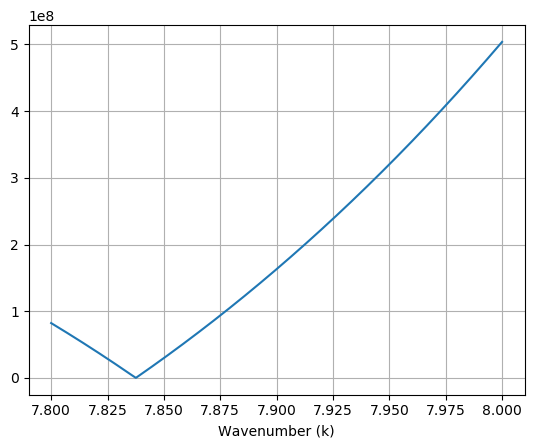

In [10]:
kv = np.linspace(7.8,8,10000)
detMv = detMnum(kv)
plt.plot(kv, abs(detMv))
plt.grid()
plt.xlabel('Wavenumber (k)')
plt.show()

In [11]:
detMnum2 = lambda k: abs(detMnum(k)) 
kroot = optimize.newton(detMnum2, 7.825)

In [12]:
kroot

7.837545580483265

In [13]:
M2 = M.subs(k, kroot)

In [14]:
Mnum = np.array(M2, dtype=complex)
evals, evecs = linalg.eig(Mnum)

The eigenvalues and the eigenvectors have been computed at this stage Our interest here is to extact the eigen vector associated with the 0 eigenvalue

In [15]:
abs(evals)

array([1.52973692e+05, 7.07716264e+01, 1.83097496e-11, 7.75095025e+01])

The last 3rd eigen value is nearly zero. We need to get the associated eigenvector

In [16]:
An, Bn, Cn, Dn = evecs[:, 2]

In [17]:
vn = v.subs([(A, An), (B, Bn), (C, Cn), (D, Dn), (k, kroot)])
vn

(0.000283818949349288 - 2.40660695039786e-16*I)*exp(7.83754558048327*x) + (-0.353695271588097 - 0.35341145263822*I)*exp(7.83754558048327*I*x) + (-0.353695271587508 + 0.353411452638784*I)*exp(-7.83754558048327*I*x) + 0.707106724227363*exp(-7.83754558048327*x)

In [18]:
vn = v.subs([(A, An), (B, Bn), (C, Cn), (D, Dn), (k, kroot)])


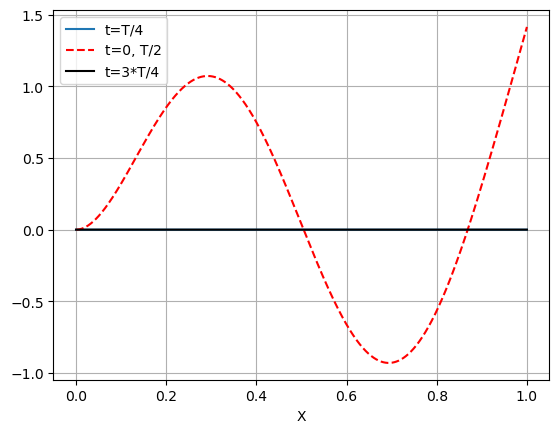

In [19]:

vnum = sympy.lambdify(x, vn)
xvec = np.linspace(0, 1.0, 10000)
vvec = vnum(xvec)
plt.show()
plt.plot(xvec, -np.imag(vvec), label='t=T/4')
plt.plot(xvec, np.real(vvec), 'r--', label='t=0, T/2')
plt.plot(xvec, np.imag(vvec), 'k', label='t=3*T/4')

plt.grid()
plt.xlabel('X')
plt.legend()
plt.show()

In [20]:

V_x_t=vn*sympy.exp(omega*t)
V_x_t_d = sympy.diff(V_x_t, x)
V_x_t_dd = sympy.diff(V_x_t_d, x)
V_x_t_ddd = sympy.diff(V_x_t_dd, x)
V_x_t_dddd = sympy.diff(V_x_t_ddd, x)
V_x_t_dt = sympy.diff(V_x_t,t)
V_x_t_dtt = sympy.diff(V_x_t_dt,t)
V_x_t_dtt
Eqn_1=Eq(EI*V_x_t_dddd);
Eqn_11=Eqn_1.subs(EI,10)
Eqn_11

Eq(10*(7.83754558048327*(0.136641187196045 - 1.15863169661699e-13*I)*exp(7.83754558048327*x) - 61.4271207261528*(21.7264821481114 + 21.7090479672129*I)*exp(7.83754558048327*I*x) - 61.4271207261528*(21.7264821480752 - 21.7090479672476*I)*exp(-7.83754558048327*I*x) + 2668.11955220242*exp(-7.83754558048327*x))*exp(omega*t), 0)

In [21]:
Eqn_2=Eq(V_x_t_dtt);
Eqn_2


Eq(omega**2*((0.000283818949349288 - 2.40660695039786e-16*I)*exp(7.83754558048327*x) + (-0.353695271588097 - 0.35341145263822*I)*exp(7.83754558048327*I*x) + (-0.353695271587508 + 0.353411452638784*I)*exp(-7.83754558048327*I*x) + 0.707106724227363*exp(-7.83754558048327*x))*exp(omega*t), 0)

In [22]:
sol=solve((Eqn_1,Eqn_2),(omega))

sol

[]